# **Insper - Eletromagnetismo e Ondulatória** #


**Laboratório 2 - Indutância e Transformador**



In [2]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
from math import pi as pi

a) Declare as variáveis do transformador: $R_1$, $R_2$, $L_1$, $L_2$ e frequência

In [4]:
R1 = 0.2
R2 = 0.2
L1 = 300e-06
L2 = 300e-06


b) Calcule na célula abaixo:

- Frequência angular
- Tensão de pico
- Indutância Mútua
- Reatâncias indutivas de $L_1$ e $L_2$
- Reatância indutiva mútua

Obsrvação: o número complexo $j=\sqrt{-1}$ é nativo da linguagem Python. Para escrever $j$, digite "1j"


c) Observe a função que criamos na célula abaixo. É a mesma que você usou nas aulas 10 e 11.

In [7]:
def CapS():
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+XC+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]



def CapP():
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+((XC*Rc)/(XC+Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

def Rpelicular(R, f):
    return R + (R/(100e3))*f

d) Agora calcule as correntes $i_1$ e $i_2$ para as duas condições de carga. Assim que calcular as correntes, calcule também $V_2$.

IMPORTANTE: para calcular as relações $N_1/N_2$, $V_1/V_2$ e $i_2/i_1$, você precisará usar o módulo dos fasores. Para calcular o módulo de um número complexo, use "np.abs(número complexo)".

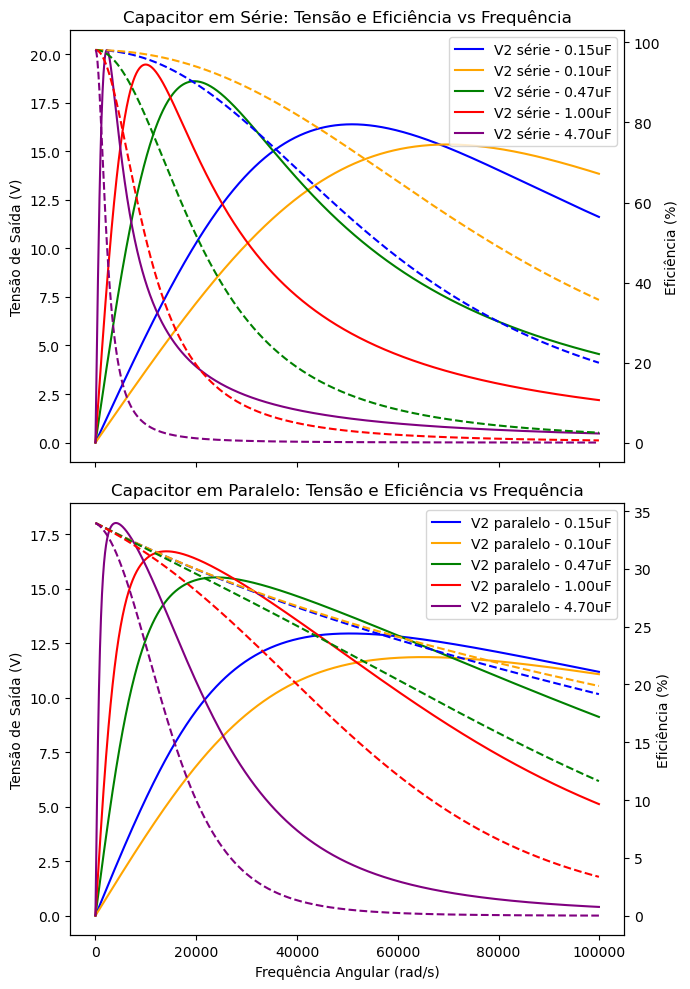

{1.5e-07: 15001.0, 1e-07: 22501.0, 4.7e-07: 65901.0, 1e-06: 38001.0, 4.7e-06: 10301.0} {1.5e-07: 0.0007504272259408482, 1e-07: 0.0005003070514335268, 4.7e-07: 1.2409617509922688e-05, 1e-06: 1.7540832956882886e-05, 4.7e-06: 5.079063365051036e-05} {1.5e-07: 0.0006595606750106847, 1e-07: 0.0004289354814010616, 4.7e-07: 0.002154907815408115, 1e-06: 4.467234760041261e-06, 4.7e-06: 8.033584046360805e-06}


In [9]:
freq_angular = np.arange(1,100e3-10,100) 
Uf=9*(2/pi)
fig, (ax_s, ax_p) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)

# Eixos duplos
ax_s2 = ax_s.twinx()
ax_p2 = ax_p.twinx()
K=0.1
capacitores_lab=[150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]
Rc=10.389
LlistS={}
LlistF={}
Fdic={}
Sdic={}
colors= {
    150e-9 : 'blue',
    0.1e-6 : 'orange',
    0.47e-6 : 'green',
    1e-6 : 'red',
    4.7e-6 : 'purple'
}



for c in capacitores_lab:
    flag_cap=True
    v2_serieL=[]
    v2_paraleloL=[]

    eficiencia_paraleloL=[]
    eficienci_serieL=[]
    for f in freq_angular:
        w= 2*pi*f
        L=1/((w**2)*c)
        M= K*((L**2)**(1/2))
    
        XC= -1j/(w*c)
        XL = w*L*1j
        XM = w*M*1j
        Zeq=(Rc*XC)/(Rc+XC)
        Rf = Rpelicular(0.2, f)
        R1=Rf
        R2=R1
    
        i1_serie,i2_serie = CapS()
        i1_paralelo, i2_paralelo = CapP()
    
        
        V2_serie = (Rc*i2_serie)
        v2_serieL.append(abs(V2_serie))
        
        V2_paralelo = abs(i2_paralelo*(Zeq))
        v2_paraleloL.append(V2_paralelo)
        
        
        S1_serie = (Uf * (i1_serie.conjugate()))/2
        S2_serie= (V2_serie*(i2_serie.conjugate())) /2
        
        eficiencia_serie = np.abs(S2_serie.real/S1_serie.real)*100
        eficienci_serieL.append(eficiencia_serie)
        

    
        S1_paralelo = (Uf* i1_paralelo.conjugate())/2
        S2_paralelo = (V2_paralelo.conjugate()*V2_paralelo.conjugate())/(2*Rc)
        eficiencia_paralelo = np.abs(S2_paralelo.real/S1_paralelo.real)*100

        eficiencia_paraleloL.append(eficiencia_paralelo)
        
    faS = freq_angular[np.argmin(np.abs(np.array(v2_serieL) - 8))]
    LachadoS=(1/((2*pi*faS)**2*c))
    LlistS[c]=LachadoS
    Sdic[c]=faS
    
    faL= freq_angular[np.argmin(np.abs(np.array(v2_paraleloL) - 8))]
    LachadoF=(1/((2*pi*faL)**2*c))
    LlistF[c]=LachadoF
    Fdic[c]=faL


    ax_s.plot(freq_angular, v2_serieL, label=f"V2 série - {c*1e6:.2f}uF", color=colors[c])
    ax_s2.plot(freq_angular, eficienci_serieL, '--', color=colors[c])

    ax_p.plot(freq_angular, v2_paraleloL, label=f"V2 paralelo - {c*1e6:.2f}uF", color=colors[c])
    ax_p2.plot(freq_angular, eficiencia_paraleloL, '--', color=colors[c])

ax_s.set_title("Capacitor em Série: Tensão e Eficiência vs Frequência")
ax_p.set_title("Capacitor em Paralelo: Tensão e Eficiência vs Frequência")

ax_s.set_ylabel("Tensão de Saída (V)")
ax_s2.set_ylabel("Eficiência (%)")
ax_p.set_ylabel("Tensão de Saída (V)")
ax_p2.set_ylabel("Eficiência (%)")
ax_p.set_xlabel("Frequência Angular (rad/s)")

ax_s.legend()
ax_p.legend()

plt.tight_layout()
plt.show()

print(Sdic,LlistS,LlistF)



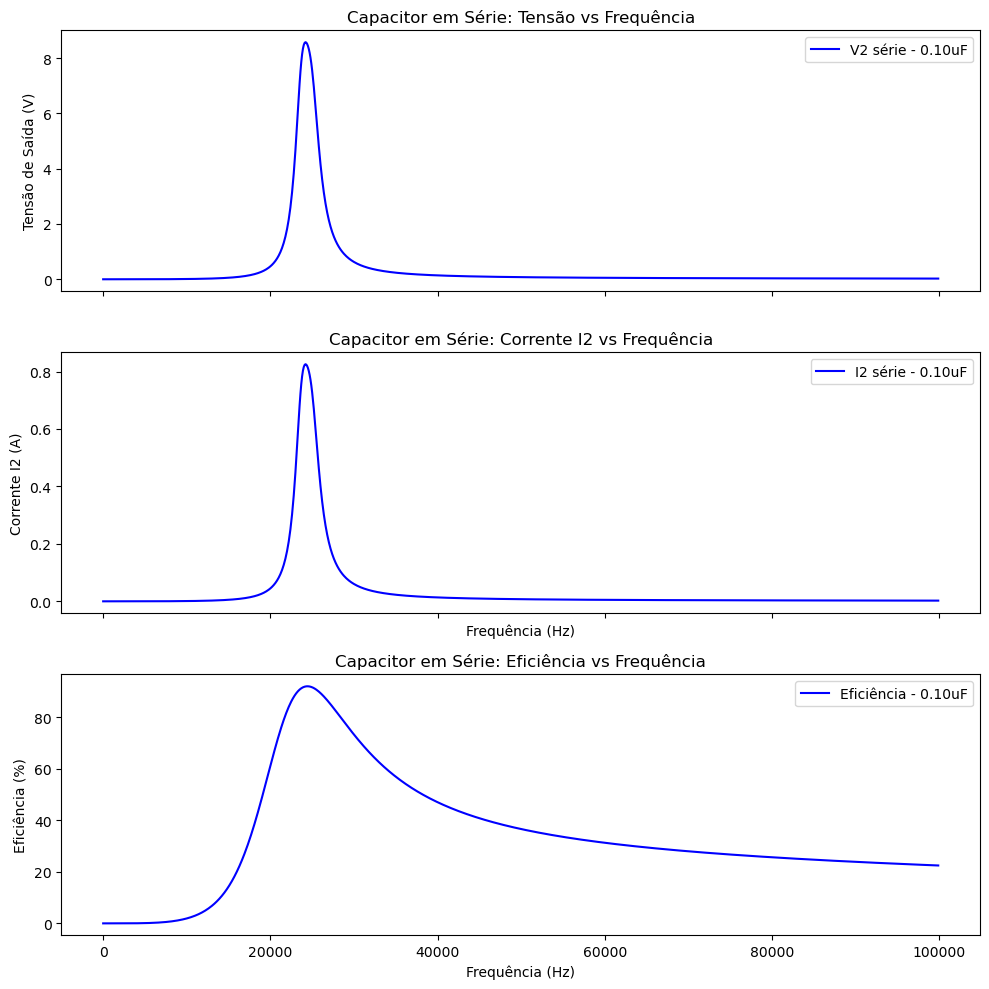

In [10]:
# Exemplo: escolha um capacitor específico para essa análise
c = 1e-7  # 0.15 uF
v2_serieL2 = []
v2_paraleloL2 = []
i2_serieL=[]
eficienci_serieL2=[]
for f in freq_angular:
    w = 2 * pi * f
    L = LlistF[c]
    M = K * ((L**2)**(1/2))

    XC = -1j / (w * c)
    XL = w * L * 1j
    XM = w * M * 1j
    Zeq = (Rc * XC) / (Rc + XC)

    Rf = Rpelicular(0.2, f)
    R1 = Rf
    R2 = R1

    # Supondo que CapS e CapP usem essas variáveis como globais ou internas
    i1_serie, i2_serie = CapS()

    i2_serieL.append(abs(i2_serie))

    V2_serie = Rc * i2_serie
    v2_serieL2.append(abs(V2_serie))

    S1_serie = (Uf * (i1_serie.conjugate()))/2
    S2_serie= (V2_serie*(i2_serie.conjugate())) /2
        
    eficiencia_serie = np.abs(S2_serie.real/S1_serie.real)*100
    eficienci_serieL2.append(eficiencia_serie)

# Plotagem
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Gráfico 1: Tensão de saída
ax1.plot(freq_angular, v2_serieL2, label=f"V2 série - {c*1e6:.2f}uF", color=colors[150e-9])
ax1.set_title("Capacitor em Série: Tensão vs Frequência")
ax1.set_ylabel("Tensão de Saída (V)")
ax1.legend()

# Gráfico 2: Corrente I2
ax2.plot(freq_angular, i2_serieL, label=f"I2 série - {c*1e6:.2f}uF", color=colors[150e-9])
ax2.set_title("Capacitor em Série: Corrente I2 vs Frequência")
ax2.set_xlabel("Frequência (Hz)")
ax2.set_ylabel("Corrente I2 (A)")
ax2.legend()

ax3.plot(freq_angular, eficienci_serieL2, label=f"Eficiência - {c*1e6:.2f}uF", color=colors[150e-9])
ax3.set_title("Capacitor em Série: Eficiência vs Frequência")
ax3.set_xlabel("Frequência (Hz)")
ax3.set_ylabel("Eficiência (%)")
ax3.legend()

plt.tight_layout()
plt.show()

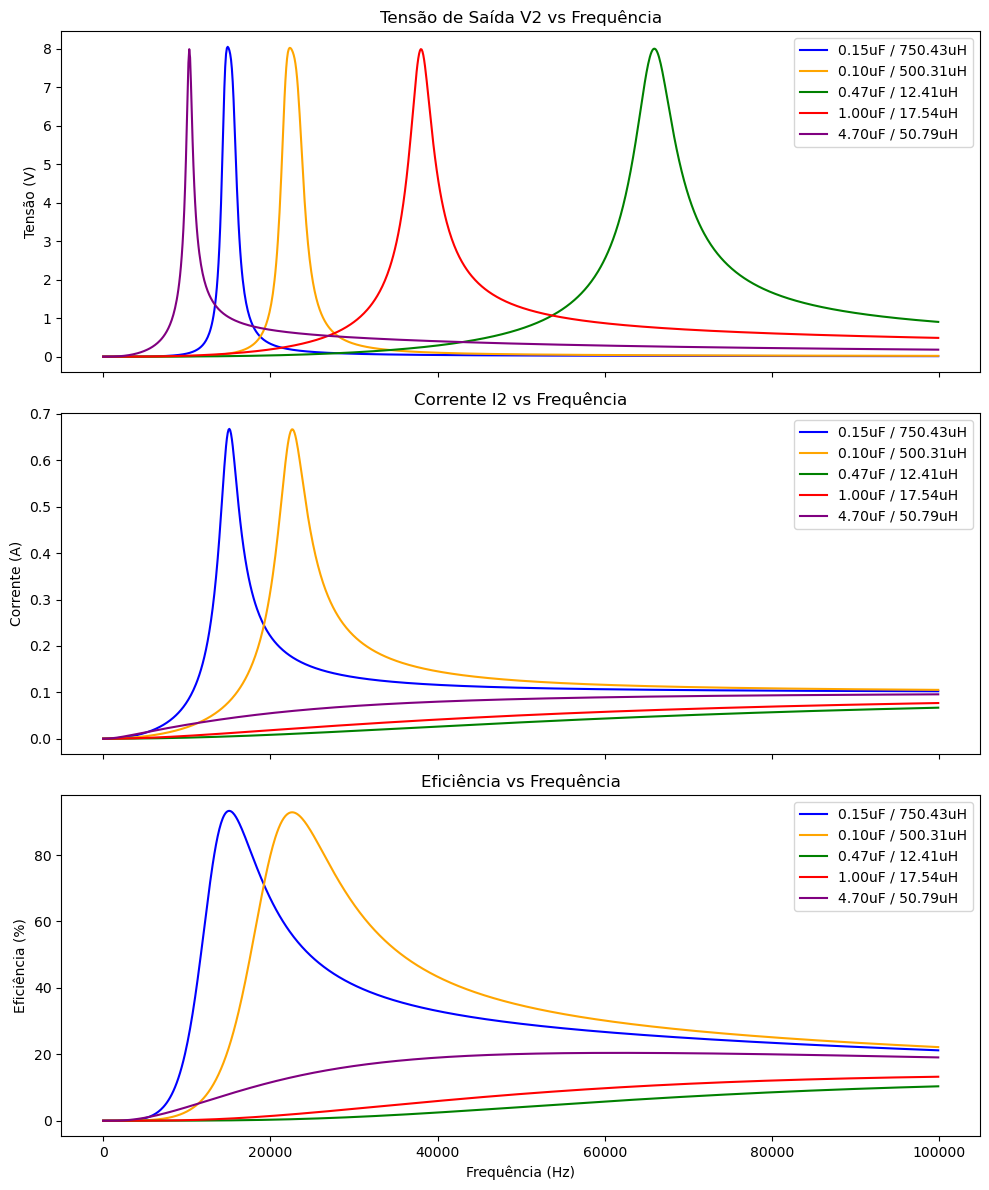

In [11]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
for c, L in LlistS.items():
    v2_serieL2 = []
    i2_serieL = []
    eficienci_serieL2 = []

    for f in freq_angular:
        w = 2 * pi * f
        M = K * ((L**2)**(1/2))

        XC = -1j / (w * c)
        XL = w * L * 1j
        XM = w * M * 1j
        Zeq = (Rc * XC) / (Rc + XC)

        Rf = Rpelicular(0.2, f)
        R1 = Rf
        R2 = R1

        # Supondo que CapS use variáveis globais ou internas
        i1_serie, i2_serie = CapS()

        i2_serieL.append(abs(i2_serie)/abs(i1_serie))

        V2_serie = Rc * i2_serie
        v2_serieL2.append(abs(V2_serie))

        S1_serie = (Uf * (i1_serie.conjugate())) / 2
        S2_serie = (V2_serie * (i2_serie.conjugate())) / 2

        eficiencia_serie = np.abs(S2_serie.real / S1_serie.real) * 100
        eficienci_serieL2.append(eficiencia_serie)

    # Plot para cada par C e L
    label_text = f"{c*1e6:.2f}uF / {L*1e6:.2f}uH"
    color = colors.get(c, None)  # assume que 'colors' usa os capacitores como chave

    ax1.plot(freq_angular, v2_serieL2, label=label_text, color=color)
    ax2.plot(freq_angular, i2_serieL, label=label_text, color=color)
    ax3.plot(freq_angular, eficienci_serieL2, label=label_text, color=color)

# Gráficos e legendas
ax1.set_title("Tensão de Saída V2 vs Frequência")
ax1.set_ylabel("Tensão (V)")
ax1.legend()

ax2.set_title("Corrente I2 vs Frequência")
ax2.set_ylabel("Corrente (A)")
ax2.legend()

ax3.set_title("Eficiência vs Frequência")
ax3.set_xlabel("Frequência (Hz)")
ax3.set_ylabel("Eficiência (%)")
ax3.legend()

plt.tight_layout()
plt.show()


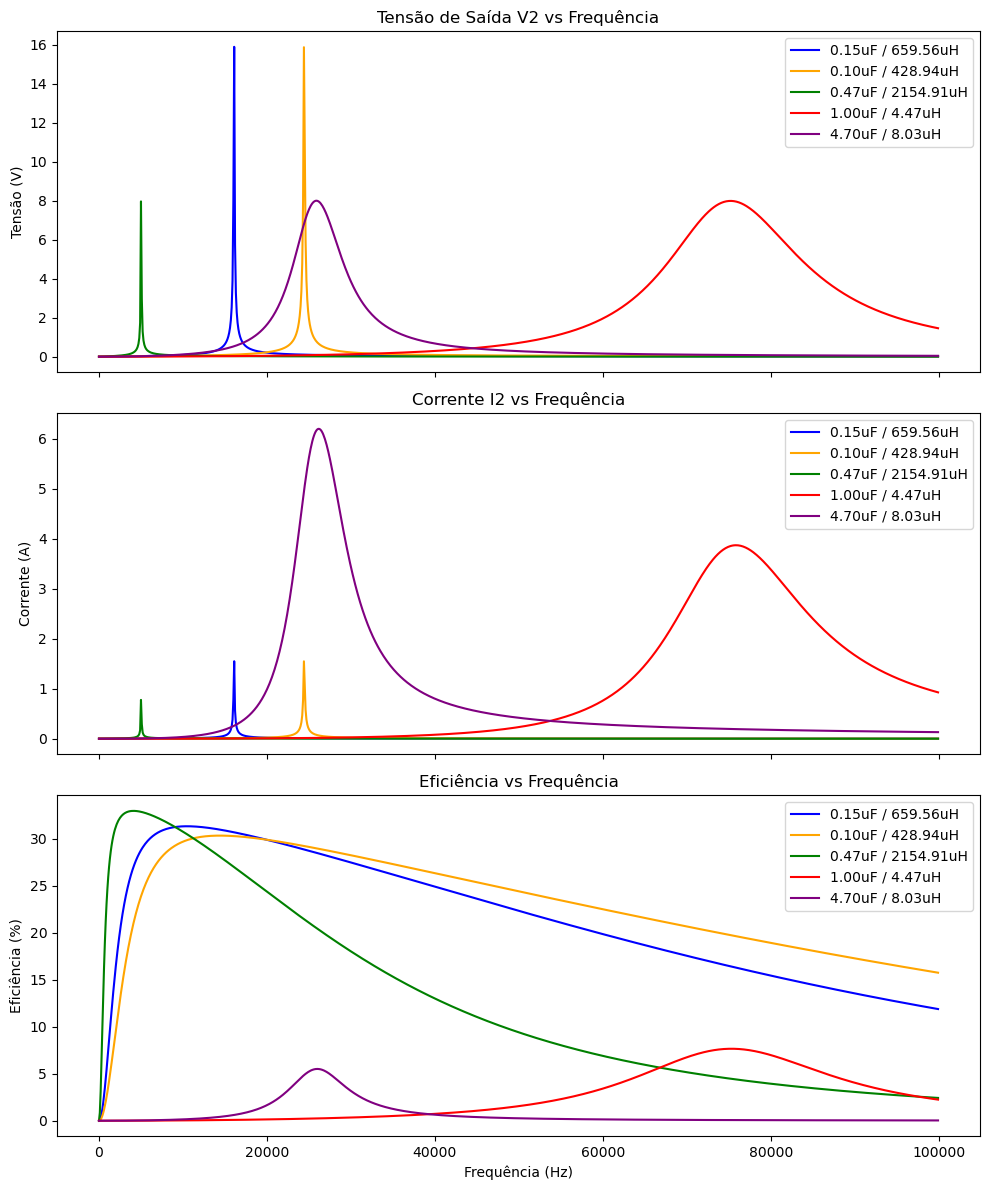

{1.5e-07: 16101.0,
 1e-07: 24401.0,
 4.7e-07: 5001.0,
 1e-06: 75201.0,
 4.7e-06: 25901.0}

In [12]:
freq_dict={}
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
freq_angular=np.arange(1,100e3-10,100) 
for c, L in LlistF.items():

    
    v2_paraleloL2 = []
    i2_paraleloL = []
    eficiencia_paraleloL2 = []

    for f in freq_angular:
        w = 2 * pi * f
        M = K * ((L**2)**(1/2))

        XC = -1j / (w * c)
        XL = w * L * 1j
        XM = w * M * 1j
        Zeq = (Rc * XC) / (Rc + XC)

        Rf = Rpelicular(0.2, f)
        R1 = Rf
        R2 = R1

    ###############
        i1_paralelo, i2_paralelo = CapP()
        i2_paraleloL.append(abs(i2_paralelo))

        
        
        V2_paralelo = abs(i2_paralelo*(Zeq))
        v2_paraleloL2.append(V2_paralelo)
        
        

    
        S1_paralelo = (Uf* i1_paralelo.conjugate())/2
        S2_paralelo = (V2_paralelo.conjugate()*V2_paralelo.conjugate())/(2*Rc)
        eficiencia_paralelo = np.abs(S2_paralelo.real/S1_paralelo.real)*100

        eficiencia_paraleloL2.append(eficiencia_paralelo)
    ###############
    faS = freq_angular[np.argmax(np.abs(np.array(v2_paraleloL2)))]
    freq_dict[c]=faS


    # Plot para cada par C e L
    label_text = f"{c*1e6:.2f}uF / {L*1e6:.2f}uH"
    color = colors.get(c, None)  # assume que 'colors' usa os capacitores como chave

    ax1.plot(freq_angular, v2_paraleloL2, label=label_text, color=color)
    ax2.plot(freq_angular, i2_paraleloL, label=label_text, color=color)
    ax3.plot(freq_angular, eficiencia_paraleloL2, label=label_text, color=color)

# Gráficos e legendas
ax1.set_title("Tensão de Saída V2 vs Frequência")
ax1.set_ylabel("Tensão (V)")
ax1.legend()

ax2.set_title("Corrente I2 vs Frequência")
ax2.set_ylabel("Corrente (A)")
ax2.legend()

ax3.set_title("Eficiência vs Frequência")
ax3.set_xlabel("Frequência (Hz)")
ax3.set_ylabel("Eficiência (%)")
ax3.legend()

plt.tight_layout()
plt.show()
freq_dict

In [13]:
print(1/((2*pi*58801)**2*1e-07))

7.326066210222607e-05


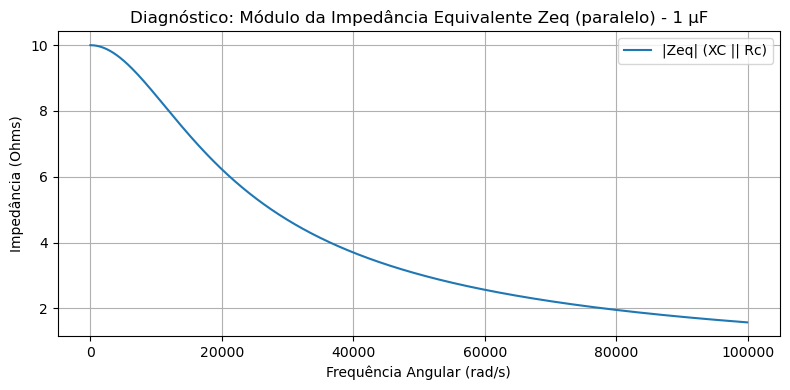

In [14]:
# Diagnóstico: comportamento da impedância equivalente Zeq (paralelo) para um capacitor específico
import matplotlib.pyplot as plt

# Parâmetros
c = 1e-6  # 1 µF
Rc = 10
K = 0.3
Zeq_list = []
freq_list = []

for f in freq_angular:
    w = 2 * pi * f
    L = 1 / ((w ** 2) * c)
    M = K * np.sqrt(L**2)
    XC = -1j / (w * c)
    
    # Impedância equivalente do ramo em paralelo (XC || Rc)
    Zeq = (Rc * XC) / (Rc + XC)
    
    Zeq_list.append(np.abs(Zeq))
    freq_list.append(f)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(freq_list, Zeq_list, label="|Zeq| (XC || Rc)")
plt.title("Diagnóstico: Módulo da Impedância Equivalente Zeq (paralelo) - 1 µF")
plt.ylabel("Impedância (Ohms)")
plt.xlabel("Frequência Angular (rad/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
fmin=22501.0
fmax=24401.0
f=24401.0
c=1e-7
L=428.94e-6


0.06

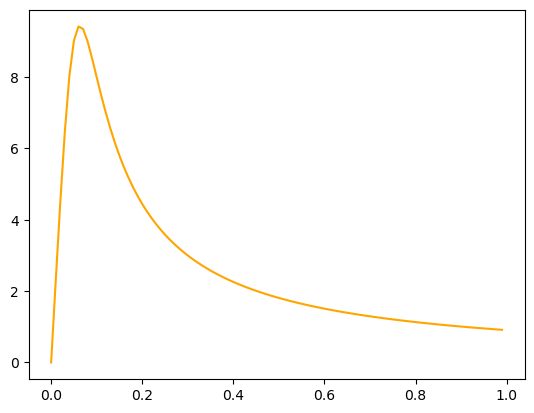

In [57]:
ks=np.arange(0,1,0.01)
i2_paraleloL=[]
v2_paraleloL2=[]
v2_max=0
for K in ks:
    w= 2*pi*f
    L=1/((w**2)*c)
    M= K*((L**2)**(1/2))
    
    XC= -1j/(w*c)
    XL = w*L*1j
    XM = w*M*1j
    Zeq=(Rc*XC)/(Rc+XC)
    Rf = Rpelicular(0.2, f)
    R1=Rf
    R2=R1

    i1_paralelo, i2_paralelo = CapP()
    i2_paraleloL.append(abs(i2_paralelo)/abs(i1_paralelo))

        
        
    V2_paralelo = abs(i2_paralelo*(Zeq))
    if V2_paralelo>v2_max:
        v2_max=V2_paralelo
        kmax=K
    v2_paraleloL2.append(V2_paralelo)
        
        

    ###############

    # Plot para cada par C e L
    label_text = f"{c*1e6:.2f}uF / {L*1e6:.2f}uH"
    color = colors.get(c, None)  # assume que 'colors' usa os capacitores como chave

plt.plot(ks, v2_paraleloL2, label=label_text, color=color)

ax1.set_title("Tensão de Saída V2 vs K'S")
ax1.set_ylabel("Tensão (V)")
ax1.legend()  
kmax